In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# imports
import sys
sys.path.append("..")
#import os
#import shutil

from utils.model import Net_mask
import torch
#from torch.distributions.multivariate_normal import MultivariateNormal

import matplotlib.pyplot as plt
import numpy as np

In [14]:
num = 0
e = 5

In [15]:
prior_weights = torch.load(f'../data/@/1.0e+0{e}/rml_noise/{num}/noise_parameter.pt')[0]
prior_weights *= -1

In [16]:
model = Net_mask()
model.load_state_dict(torch.load(f'../data/@/weight_init/rml_e{e}_{num}.pth'))
init_weights = torch.cat([param.view(-1) for param in model.parameters()])
#model.load_state_dict(torch.load(f'../saved_models/testing/rml/long/e{e}/{num}/model_weights.pth'))
model.load_state_dict(torch.load(f'../saved_models/testing/rml/long/e4/{num}/model_weights.pth'))
posterior_weights = torch.cat([param.view(-1) for param in model.parameters()])
n_param = len(prior_weights)
print(n_param)

13210


(array([0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 7.000e+00, 4.000e+00, 5.000e+00, 8.000e+00, 7.000e+00,
        1.600e+01, 2.600e+01, 2.100e+01, 3.000e+01, 4.800e+01, 5.900e+01,
        5.900e+01, 9.300e+01, 1.300e+02, 1.640e+02, 2.050e+02, 2.520e+02,
        3.190e+02, 3.900e+02, 4.140e+02, 4.840e+02, 6.280e+02, 7.680e+02,
        9.010e+02, 1.507e+03, 1.558e+03, 8.750e+02, 7.340e+02, 6.780e+02,
        5.540e+02, 4.480e+02, 3.710e+02, 2.930e+02, 2.390e+02, 2.020e+02,
        1.750e+02, 1.170e+02, 8.300e+01, 7.400e+01, 5.600e+01, 4.800e+01,
        3.400e+01, 1.900e+01, 1.500e+01, 1.500e+01, 1.500e+01, 7.000e+00,
        1.300e+01, 7.000e+00, 6.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        5.000e+00, 1.000e+00, 0.000e+0

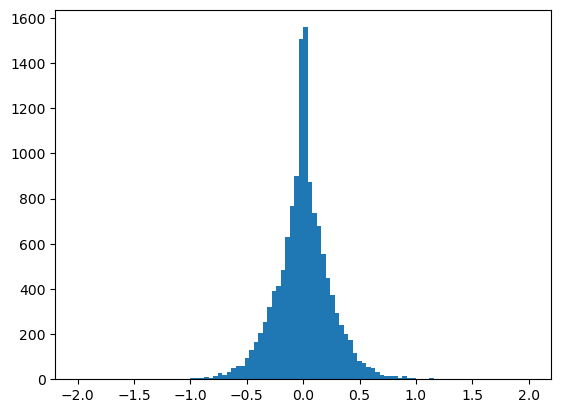

In [17]:
plt.hist(posterior_weights.detach(), range=[-2, 2], bins=100)

In [18]:
print(torch.min(posterior_weights))
print(torch.max(posterior_weights))

tensor(-2.2367, grad_fn=<MinBackward1>)
tensor(1.4605, grad_fn=<MaxBackward1>)


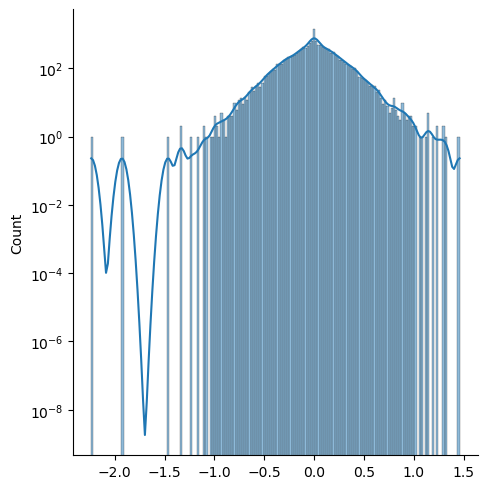

In [19]:
import numpy as np
import seaborn as sns


#a = np.random.normal(mu,sigma,n)
#sns.displot(posterior_weights.detach(), log_scale=True)
#sns.displot(posterior_weights.detach(), kind="kde")
a = sns.displot(posterior_weights.detach(), kde=True)
#a = sns.displot(posterior_weights.detach(), kind="kde")
#a.axes[0].set_yscale('log')
#a.set(xlim=(-2, 2))
plt.yscale('log')
#a.set(ylim=(0,0.01))
#a.set(ylim=(0,1))

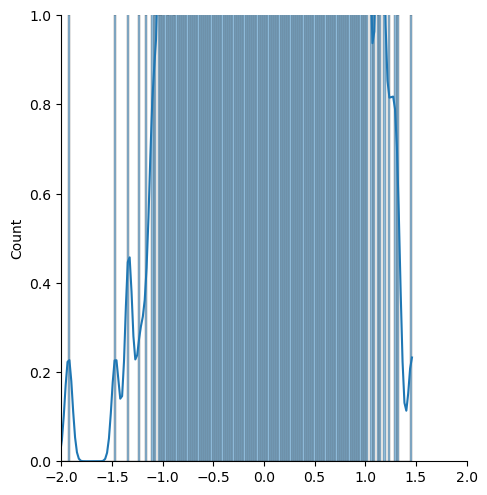

In [20]:
import numpy as np
import seaborn as sns

n = 50000  # sample size
mu = 0  # mean
sigma = 1  # sd

#a = np.random.normal(mu,sigma,n)
#sns.displot(posterior_weights.detach(), log_scale=True)
#sns.displot(posterior_weights.detach(), kind="kde")
a = sns.displot(posterior_weights.detach(), kde=True)
#a = sns.displot(posterior_weights.detach(), kind="kde")
a.set(xlim=(-2, 2))
#a.set(ylim=(0,0.01))
a.set(ylim=(0,1))

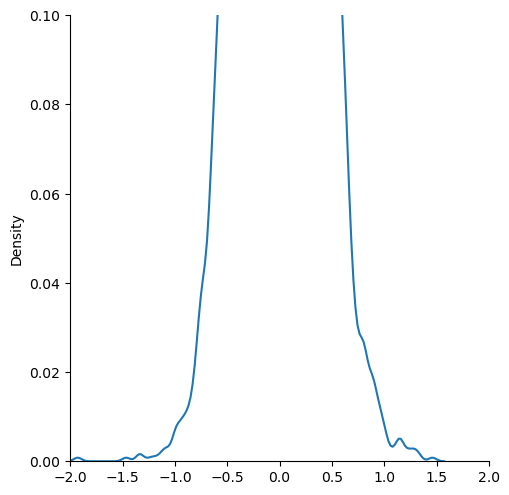

In [21]:
import numpy as np
import seaborn as sns

#a = np.random.normal(mu,sigma,n)
#sns.displot(posterior_weights.detach(), log_scale=True)
#sns.displot(posterior_weights.detach(), kind="kde")
#a = sns.displot(posterior_weights.detach(), kde=True)
a = sns.displot(posterior_weights.detach(), kind="kde")
a.set(xlim=(-2, 2))
#a.set(ylim=(0,0.01))
a.set(ylim=(0,0.1))

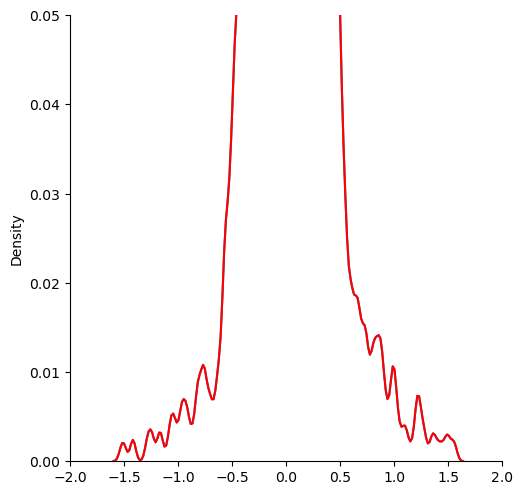

In [47]:
g = sns.displot(posterior_weights.detach(), kind="kde")
g.set(xlim=(-2, 2))
g.set(ylim=(0,0.05))
ax = g.axes[0, 0]
line = ax.lines[0]
x, y = line.get_data()
ax.plot(x, y, "r")

In [46]:
print(len(x))
print(len(y))
print(y)

200
200
[1.38203921e-05 8.15274326e-05 3.19224538e-04 8.44707903e-04
 1.55307643e-03 2.05152639e-03 2.00085896e-03 1.49090665e-03
 1.05504360e-03 1.23397075e-03 1.94642365e-03 2.40093170e-03
 2.00148413e-03 1.10460327e-03 4.06276936e-04 1.30969120e-04
 1.96595423e-04 6.37936433e-04 1.52252723e-03 2.58506931e-03
 3.34674489e-03 3.57612426e-03 3.23280113e-03 2.51506624e-03
 2.13443273e-03 2.56096312e-03 3.21614309e-03 3.17974200e-03
 2.38173021e-03 1.64734552e-03 1.75729188e-03 2.77175089e-03
 4.14495319e-03 5.15543205e-03 5.34209801e-03 4.84164409e-03
 4.34440948e-03 4.61114422e-03 5.66320524e-03 6.65041875e-03
 6.97550732e-03 6.75545409e-03 6.03814403e-03 4.95928819e-03
 4.17229745e-03 4.24531666e-03 5.37655971e-03 7.24932994e-03
 8.86549148e-03 9.68292323e-03 1.02901091e-02 1.07992155e-02
 1.03850131e-02 9.19261621e-03 8.21619908e-03 7.53712429e-03
 6.94667924e-03 6.95495490e-03 7.95703297e-03 9.62411095e-03
 1.14577048e-02 1.40212934e-02 1.83671124e-02 2.34448983e-02
 2.70044401e-02 

In [113]:
f_list = list(range(40)) + list(range(59, 74)) + list(range(80,100)) 
f_len = len(f_list)
areas_num = torch.zeros(2, 4, f_len)
e = 4
x_points = np.zeros((f_len, 200))
y_points = np.zeros((f_len, 200))
#for idx, e in enumerate([4, 5]):
for idx_num, num in enumerate(f_list):
    #prior_weights = torch.load(f'../data/@/1.0e+0{e}/rml_noise/{num}/noise_parameter.pt')[0]
    #prior_weights *= -1
    #model = Net_mask()
    model.load_state_dict(torch.load(f'../saved_models/testing/rml/long/e{e}/{num}/model_weights.pth'))
    posterior_weights = torch.cat([param.view(-1) for param in model.parameters()])
    
    #plt.ioff()
    g = sns.displot(posterior_weights.detach(), kind="kde")
    g.set(xlim=(-2, 2))
    g.set(ylim=(0,0.05))
    ax = g.axes[0, 0]
    line = ax.lines[0]
    x, y = line.get_data()
    #ax.plot(x, y, "r")
    x_points[idx_num] = x
    y_points[idx_num] = y


/Users/andersbredesenhatlelid/opt/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


In [117]:
#plt.ion()
plt.plot(x_points[0], y_points[0])

(0.0, 0.02)

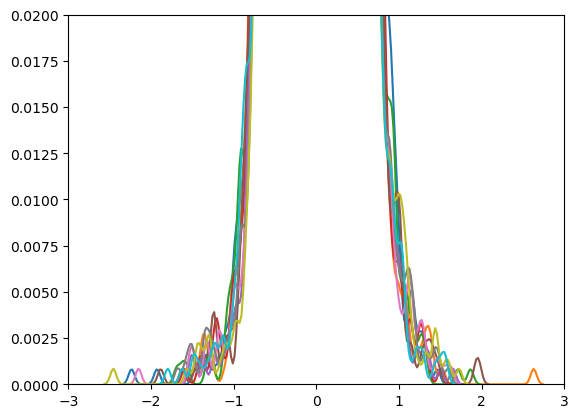

In [70]:
#plt.plot(x_points[0], y_points[0])
plt.plot(x_points[0], y_points[0], '-')
plt.plot(x_points[1], y_points[1], '-')
plt.plot(x_points[2], y_points[2], '-')
plt.plot(x_points[3], y_points[3], '-')
plt.plot(x_points[4], y_points[4], '-')
plt.plot(x_points[5], y_points[5], '-')
plt.plot(x_points[6], y_points[6], '-')
plt.plot(x_points[7], y_points[7], '-')
plt.plot(x_points[8], y_points[8], '-')
plt.plot(x_points[9], y_points[9], '-')
#plt.plot(x_points[0:2], y_points[0:2], '.')
plt.xlim(-3, 3)
plt.ylim(0, 0.02)

(-3.0, 3.0)

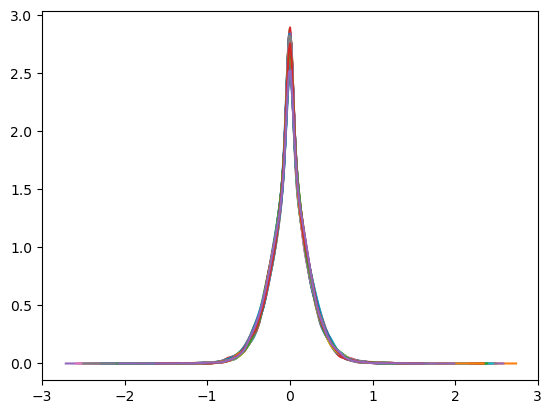

In [112]:
#plt.plot(x_points[0], y_points[0])
for i in range(f_len):
    plt.plot(x_points[i], y_points[i], '-', alpha=1)
#plt.xlim(-1, 1)
plt.xlim(-3, 3)
#plt.ylim(0, 0.01)

(0.0, 0.006)

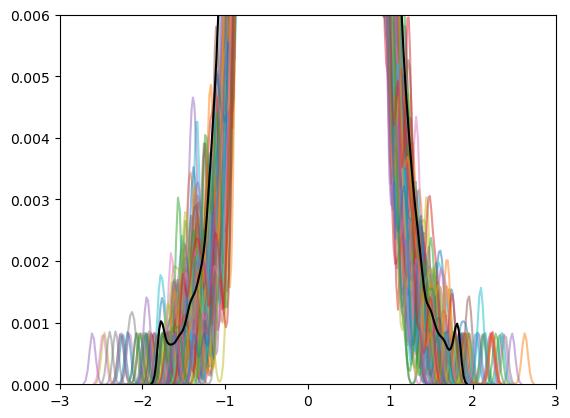

In [109]:
#plt.plot(x_points[0], y_points[0])
#for i in range(f_len):
for i in range(f_len):
    plt.plot(x_points[i], y_points[i], '-', alpha=0.5)
plt.plot(np.mean(x_points, axis=0), np.mean(y_points, axis=0), 'k-', alpha=1)
plt.xlim(-3, 3)
plt.ylim(0, 0.006)

(0.0, 0.01)

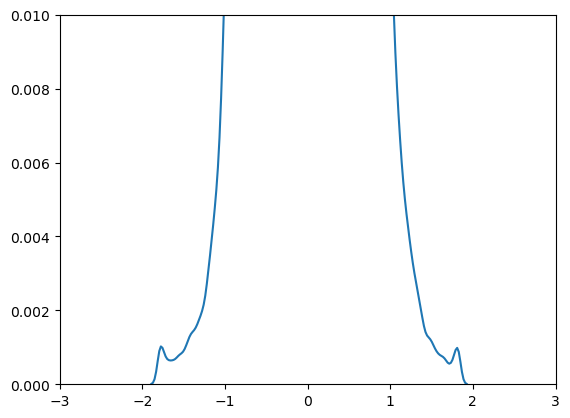

In [84]:
#plt.plot(x_points[0], y_points[0])
plt.plot(np.mean(x_points, axis=0), np.mean(y_points, axis=0), '-', alpha=1)
plt.xlim(-3, 3)
plt.ylim(0, 0.01)

In [24]:
print(init_weights)
print(prior_weights)
print(posterior_weights)

tensor([ 0.2141,  0.1882,  0.1617,  ...,  0.0353, -0.0058,  0.0218],
       grad_fn=<CatBackward0>)
tensor([ 0.0716, -0.2811,  0.1117,  ...,  0.0373,  0.0394,  0.1918])
tensor([0.0238, 0.0733, 0.1377,  ..., 0.3689, 0.0090, 0.3881],
       grad_fn=<CatBackward0>)


In [25]:
print(torch.sum((init_weights + prior_weights)**2))

tensor(1281.4557, grad_fn=<SumBackward0>)


In [26]:
x_min = -1
x_max = 1
lim1 = 0.1
lim2 = 0.1
#lim2 = lim1
x = np.linspace(x_min, x_max, 1000)
x2_p1 = np.linspace(x_min, lim2-lim1, 1000)
x2_p2 = np.linspace(lim2+lim1, x_max, 1000)
x2_p3 = np.linspace(x_min, -lim1 - lim2, 1000)
x2_p4 = np.linspace(-lim2 + lim1, x_max, 1000)
y2_p1 = x2_p1*0+lim2
y2_p2 = x2_p2*0+lim2
y2_p3 = x2_p3*0 -lim2
y2_p4 = x2_p4*0 -lim2
a1_up = lim1 + x
a1_down = -lim1 + x
a2_up = lim2 + 0*x
a2_down = -lim2 + 0*x

p_x = [lim2 - lim1, lim2 + lim1, -lim2 - lim1, -lim2 + lim1]
p_y = [lim2, lim2, -lim2, -lim2]

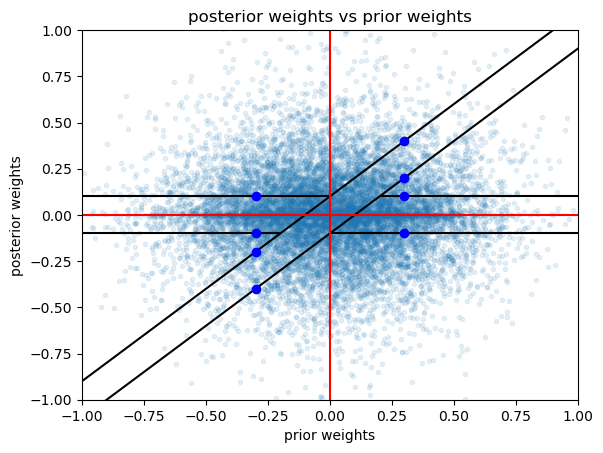

In [27]:
plt.plot(prior_weights.detach(), posterior_weights.detach(), '.', alpha=0.1)
plt.plot(x, a1_up, 'k')
plt.plot(x, a1_down, 'k')
plt.plot(x2_p1, y2_p1, 'k')
plt.plot(x2_p2, y2_p2, 'k')
plt.plot(x2_p3, y2_p3, 'k')
plt.plot(x2_p4, y2_p4, 'k')
#plt.plot(x, a2_up, 'r')
#plt.plot(x, a2_down, 'r')
#plt.plot(p_x, p_y, 'bo')
#plt.plot([-1, 1], [-1, 1], alpha=0.1)

x_point = 0.3
a1_min = x_point - lim1
a1_max = x_point + lim1
a2_min = -lim2
a2_max = lim2
x_point_neg = -0.3
a1_min_neg = x_point_neg - lim1
a1_max_neg = x_point_neg + lim1
a2_min_neg = -lim2
a2_max_neg = lim2
plt.plot([x_point, x_point, x_point, x_point], [a1_min, a1_max, a2_min, a2_max], 'bo')
plt.plot([x_point_neg, x_point_neg, x_point_neg, x_point_neg], [a1_min_neg, a1_max_neg, a2_min_neg, a2_max_neg], 'bo')

plt.plot(x, x*0, 'r')
plt.plot(0*x, x, 'r')
plt.axis([x_min, x_max, x_min, x_max])
plt.xlabel('prior weights')
plt.ylabel('posterior weights')
plt.title('posterior weights vs prior weights')
plt.savefig(f'../figures/plot_weights/plot_weights.png')

In [28]:
#prior_weights = prior_weights 
a1_min_tens = prior_weights - lim1
a1_max_tens = prior_weights + lim1
a2_min_tens = prior_weights*0 - lim2
a2_max_tens = prior_weights*0 + lim2

In [29]:
#plt.plot(prior_weights, a1_min_tens, '.', alpha=0.1)
#plt.plot(prior_weights, a1_max_tens, '.', alpha=0.1)
#plt.plot(prior_weights, a2_min_tens, '.', alpha=0.1)
#plt.plot(prior_weights, a2_max_tens, '.', alpha=0.1)

(-1.0, 1.0, -1.0, 1.0)

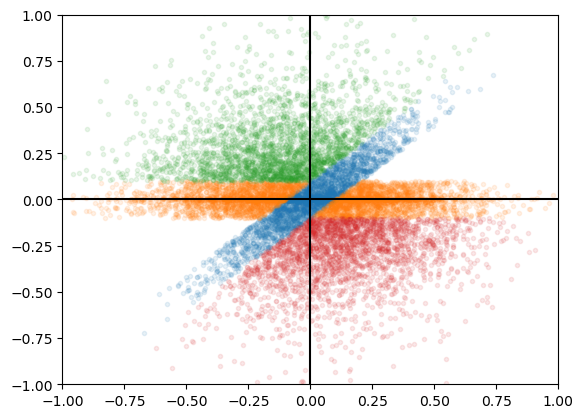

In [30]:
a1_mask = torch.logical_and(posterior_weights >= a1_min_tens, posterior_weights <= a1_max_tens)
a2_mask = torch.logical_and(torch.logical_not(a1_mask), torch.logical_and(posterior_weights >= a2_min_tens, posterior_weights <= a2_max_tens))
a3_mask = torch.logical_and(posterior_weights > a1_max_tens, posterior_weights > a2_max_tens)
a4_mask = torch.logical_and(posterior_weights < a1_min_tens, posterior_weights < a2_min_tens)
a1_prior = torch.masked_select(prior_weights, a1_mask)
a2_prior = torch.masked_select(prior_weights, a2_mask)
a3_prior = torch.masked_select(prior_weights, a3_mask)
a4_prior = torch.masked_select(prior_weights, a4_mask)
a1_posterior = torch.masked_select(posterior_weights, a1_mask)
a2_posterior = torch.masked_select(posterior_weights, a2_mask)
a3_posterior = torch.masked_select(posterior_weights, a3_mask)
a4_posterior = torch.masked_select(posterior_weights, a4_mask)
plt.plot(a1_prior.detach(), a1_posterior.detach(), '.', alpha=0.1)
plt.plot(a2_prior.detach(), a2_posterior.detach(), '.', alpha=0.1)
plt.plot(a3_prior.detach(), a3_posterior.detach(), '.', alpha=0.1)
plt.plot(a4_prior.detach(), a4_posterior.detach(), '.', alpha=0.1)

plt.plot(x, x*0, 'k')
plt.plot(0*x, x, 'k')

plt.axis([x_min, x_max, x_min, x_max])

In [31]:
a1_mask = torch.logical_and(posterior_weights >= a1_min_tens, posterior_weights <= a1_max_tens)
print(len(a1_mask[a1_mask]))
print(torch.sum(a1_mask*1))

2772
tensor(2772)


In [32]:
x_min = -1
x_max = 1
lim1 = 0.1
lim2 = 0.1

f_list = list(range(40)) + list(range(59, 74)) + list(range(80,100)) 
f_len = len(f_list)
areas_num = torch.zeros(2, 4, f_len)
for idx, e in enumerate([4, 5]):
    for idx_num, num in enumerate(f_list):
        prior_weights = torch.load(f'../data/@/1.0e+0{e}/rml_noise/{num}/noise_parameter.pt')[0]
        prior_weights *= -1
        model = Net_mask()
        model.load_state_dict(torch.load(f'../saved_models/testing/rml/long/e{e}/{num}/model_weights.pth'))
        posterior_weights = torch.cat([param.view(-1) for param in model.parameters()])

        a1_min_tens = prior_weights - lim1
        a1_max_tens = prior_weights + lim1
        a2_min_tens = prior_weights*0 - lim2
        a2_max_tens = prior_weights*0 + lim2
        
        a1_mask = torch.logical_and(posterior_weights >= a1_min_tens, posterior_weights <= a1_max_tens)
        a2_mask = torch.logical_and(torch.logical_not(a1_mask), torch.logical_and(posterior_weights >= a2_min_tens, posterior_weights <= a2_max_tens))
        a3_mask = torch.logical_and(posterior_weights > a1_max_tens, posterior_weights > a2_max_tens)
        a4_mask = torch.logical_and(posterior_weights < a1_min_tens, posterior_weights < a2_min_tens)

        areas_num[idx, 0, idx_num] = torch.sum(a1_mask*1)
        areas_num[idx, 1, idx_num] = torch.sum(a2_mask*1)
        areas_num[idx, 2, idx_num] = torch.sum(a3_mask*1)
        areas_num[idx, 3, idx_num] = torch.sum(a4_mask*1)

In [33]:
title = f'{"Size":10}|{"Area":10}|{"min":10}|{"P10":10}|{"P50":10}|{"P90":10}|{"max":10}|\n'
s = title
#s += f'{"-":10}|{"-":10}|{"-":10}|{"-":10}|{"-":10}|{"-":10}|{"-":10}|{"-":10}|\n'
s += '-'*77 + '\n'
e = 0
for a in range(4):
    s += f'{"e4":10}|{a+1:10}|{torch.quantile(areas_num[e,a], 0)/n_param*100:10.2f}|{torch.quantile(areas_num[e,a], 0.1)/n_param*100:10.2f}|{torch.quantile(areas_num[e,a], 0.5)/n_param*100:10.2f}|{torch.quantile(areas_num[e,a], 0.9)/n_param*100:10.2f}|{torch.quantile(areas_num[e,a], 1)/n_param*100:10.2f}|\n'
s += '-'*77 + '\n'
e = 1
for a in range(4):
    s += f'{"e5":10}|{a+1:10}|{torch.quantile(areas_num[e,a], 0)/n_param*100:10.2f}|{torch.quantile(areas_num[e,a], 0.1)/n_param*100:10.2f}|{torch.quantile(areas_num[e,a], 0.5)/n_param*100:10.2f}|{torch.quantile(areas_num[e,a], 0.9)/n_param*100:10.2f}|{torch.quantile(areas_num[e,a], 1)/n_param*100:10.2f}|\n'
s += '-'*77 + '\n'

#print(torch.quantile(areas_num[0,0], 0))
#print(torch.quantile(areas_num[0,0], 0.1))
#print(torch.quantile(areas_num[0,0], 0.5))
#print(torch.quantile(areas_num[0,0], 0.9))
#print(torch.quantile(areas_num[0,0], 1))
print(s)



Size      |Area      |min       |P10       |P50       |P90       |max       |
-----------------------------------------------------------------------------
e4        |         1|     50.66|     53.25|     55.09|     57.51|     59.61|
e4        |         2|     20.30|     21.53|     22.90|     24.05|     25.53|
e4        |         3|      5.40|      5.84|      6.43|      6.92|      7.36|
e4        |         4|      5.23|      5.65|      6.12|      6.59|      7.34|
-----------------------------------------------------------------------------
e5        |         1|     26.28|     26.80|     27.37|     27.95|     28.28|
e5        |         2|     44.77|     45.50|     46.72|     47.56|     48.38|
e5        |         3|      7.15|      7.31|      7.66|      8.00|      8.42|
e5        |         4|      6.15|      6.58|      6.93|      7.26|      7.60|
-----------------------------------------------------------------------------



(array([ 1.,  0.,  0.,  0.,  3.,  5.,  5.,  8.,  6., 10.,  4.,  4., 11.,
         5.,  4.,  4.,  2.,  2.,  0.,  1.]),
 array([6692.  , 6751.15, 6810.3 , 6869.45, 6928.6 , 6987.75, 7046.9 ,
        7106.05, 7165.2 , 7224.35, 7283.5 , 7342.65, 7401.8 , 7460.95,
        7520.1 , 7579.25, 7638.4 , 7697.55, 7756.7 , 7815.85, 7875.  ],
       dtype=float32),
 <BarContainer object of 20 artists>)

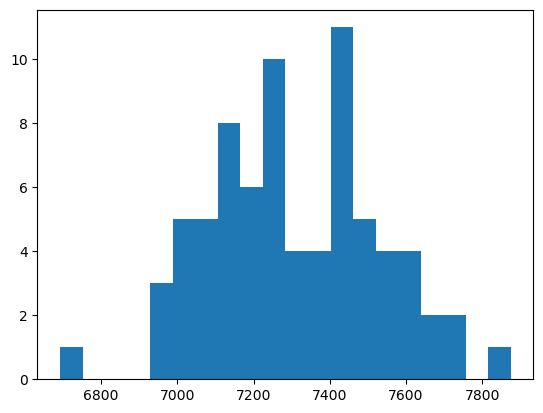

In [34]:
plt.hist(areas_num[0,0], bins=20)


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 7.000e+00, 5.000e+00, 7.000e+00, 4.000e+00, 8.000e+00,
        6.000e+00, 9.000e+00, 1.200e+01, 1.100e+01, 5.000e+00, 1.300e+01,
        1.600e+01, 1.400e+01, 1.600e+01, 1.400e+01, 1.500e+01, 2.700e+01,
        3.300e+01, 2.000e+01, 3.000e+0

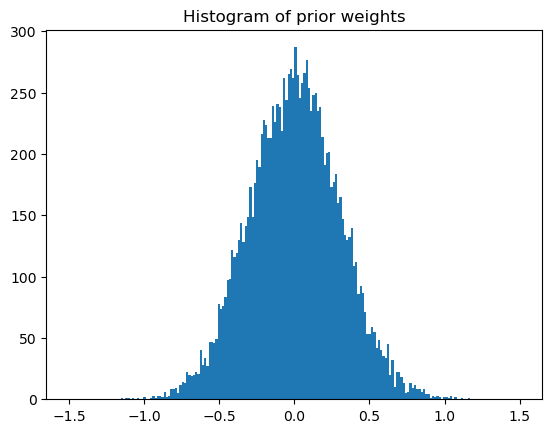

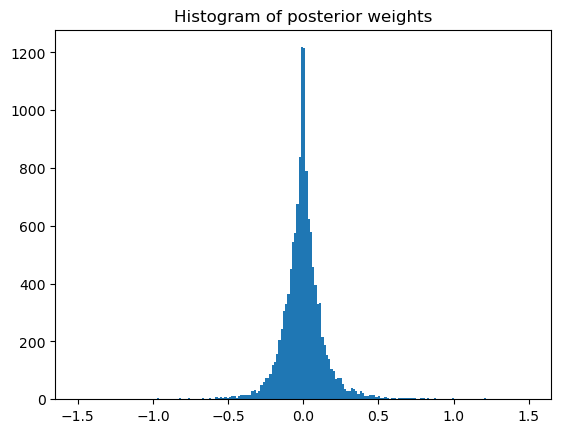

In [35]:
plt.figure(1)
plt.title('Histogram of prior weights')
plt.hist(prior_weights.detach(), range=[-1.5, 1.5], bins=200)
plt.figure(2)
plt.title('Histogram of posterior weights')
plt.hist(posterior_weights.detach(), range=[-1.5, 1.5], bins=200)

In [36]:
sorted_prior, _ = torch.sort(prior_weights)
sorted_posterior, _ = torch.sort(posterior_weights)
print(sorted_prior)
print(sorted_posterior)

tensor([-1.1522, -1.1106, -1.0960,  ...,  1.0796,  1.1140,  1.1589])
tensor([-1.5253, -1.4983, -1.4242,  ...,  1.4956,  1.5377,  1.5631],
       grad_fn=<SortBackward0>)


In [37]:
print(torch.mean(prior_weights))
print(torch.std(prior_weights))
print(torch.mean(posterior_weights))
print(torch.std(posterior_weights))

tensor(0.0019)
tensor(0.3003)
tensor(0.0003, grad_fn=<MeanBackward0>)
tensor(0.1653, grad_fn=<StdBackward0>)


Text(0, 0.5, 'prior')

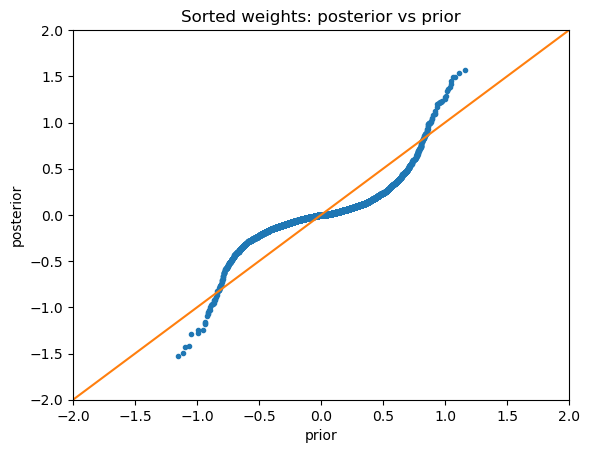

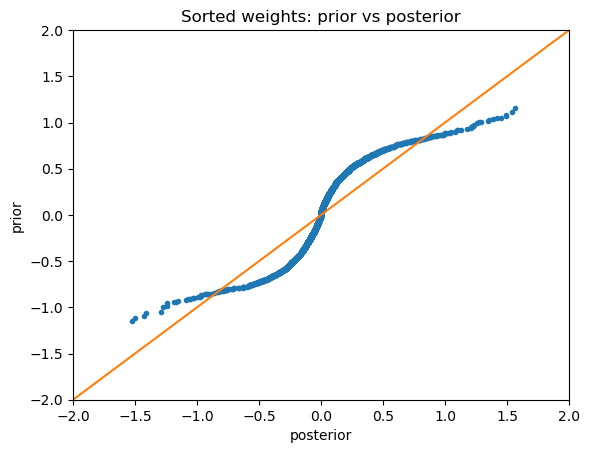

In [38]:
plt.figure()
plt.title('Sorted weights: posterior vs prior')
plt.plot(sorted_prior.detach(), sorted_posterior.detach(), '.')
plt.plot([-2, 2], [-2, 2])
plt.axis([-2, 2, -2, 2])
plt.xlabel('prior')
plt.ylabel('posterior')
plt.figure()
plt.title('Sorted weights: prior vs posterior')
plt.plot(sorted_posterior.detach(), sorted_prior.detach(), '.')
plt.plot([-2, 2], [-2, 2])
plt.axis([-2, 2, -2, 2])
plt.xlabel('posterior')
plt.ylabel('prior')